## Purpose of this notebook 

To scrape SGX webpage for all listed companies' information. This is the raw notebook, i.e contains all the trial and errors that resulted in the final scraper

In [23]:
#importing the required libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests 
import pandas as pd

### Trial Test with one URL

['\n',
 'html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"',
 '\n',
 <html xmlns="http://www.w3.org/1999/xhtml">
 <head id="Head1"><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="/image/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Stocks.css" rel="stylesheet" type="text/css"/>
 <!-- Custom Corporate announcement -->
 <link href="../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Master.css" rel="stylesheet" type="text/css"/>
 <!--Warrants-->
 <link href="../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Warrants.css" rel="stylesheet" type="text/css"/>
 <!--CorpInfo-->
 <link href="../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_CorpInfo.css" rel="stylesheet" type="text/css"/>
 <!--IPOAllinOne-->
 <link href="../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_IPO_Page.css" rel="stylesheet" type="text/cs
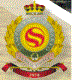

In [2]:
url = "https://links.sgx.com/1.0.0/corporate-information/2178"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
list(soup.children)

In [3]:
#extracting relevant information from url 
company_name = soup.find(id="ctl07_compFullNameLabel").get_text()
company_link = soup.find(id='ctl07_compWebHypLink').get_text()
incorporated = soup.find(id='ctl07_incorporatedLabel').get_text()
listed_on = soup.find(id='ctl07_listingDateLabel').get_text()
ISIN_code = soup.find(id='ctl07_isinCodeLabel').get_text()

print(company_name)
print(company_link)
print(incorporated)
print(listed_on)
print(ISIN_code)

In [5]:
#trying to see how to debug a webpage that doesnt exist
url = "https://links.sgx.com/1.0.0/corporate-information/3000"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
list(soup.children)

['\n',
 'html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"',
 '\n',
 <html xmlns="http://www.w3.org/1999/xhtml">
 <head>
 <style type="text/css">
         .ms-descriptiontext
         {
             /* [ReplaceColor(themeColor:"Dark1-Medium")] */
             color: #4c4c4c;
             font-family: tahoma;
             font-size: 8pt;
             text-align: left;
         }
         td
         {
             font-size: 12px;
         }
     </style>
 <title>
 	Error
 </title><link href="/image/favicon.ico" rel="shortcut icon" type="image/x-icon"/></head>
 <body>
 <form action="./CustomErrorPage.aspx" id="form1" method="post" name="form1">
 <input id="__VIEWSTATE" name="__VIEWSTATE" type="hidden" value="/wEPDwUKLTQ1MDg0MTUzOA9kFgICAw9kFgQCAQ8PFgQeBFRleHQFEE5vIFJlY29yZCBGb3VuZC4eB1Zpc2libGVnZGQCBQ8PFgQfAAUUMTkvOS8yMDIwIDI6MjA6NTIgUE0fAWdkZGSoe9fa+5Lzfo6jj8/wmDwPfkhC4Q=="/>
 <input id="__VIEWSTATEGENERATOR" name="__VIEWSTAT

In [6]:
# Think we can do a if else statement based on differences in title 
soup.find('title').get_text()

'\r\n\tError\r\n'

In [7]:
url = "https://links.sgx.com/1.0.0/corporate-information/2178"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
soup.find('title').get_text()

'\n'

## Actual Scraping

In [18]:
# First loop from 1 to less than 1000
id_1 = []
coy_name_1 = []
coy_weblink_1 = []
coy_country_1 = []
coy_listing_1 = []
coy_ISIN_1 = []
for n in range(1000):
    url = "https://links.sgx.com/1.0.0/corporate-information/"+ str(n)
    page = requests.get(url, timeout=30)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    if soup.find('title').get_text() == '\r\n\tError\r\n':
        pass
    else: 
        id_1.append(n)
        print(id_1)
        coy_name_1.append(soup.find(id="ctl07_compFullNameLabel").get_text())
        coy_country_1.append(soup.find(id='ctl07_incorporatedLabel').get_text())
        coy_listing_1.append(soup.find(id='ctl07_listingDateLabel').get_text())
        coy_ISIN_1.append(soup.find(id='ctl07_isinCodeLabel').get_text())
        coy_weblink_1.append(soup.find(id='ctl07_compWebHypLink').get_text())

[965]
[965, 966]
[965, 966, 967]
[965, 966, 967, 968]
[965, 966, 967, 968, 969]
[965, 966, 967, 968, 969, 970]
[965, 966, 967, 968, 969, 970, 971]
[965, 966, 967, 968, 969, 970, 971, 972]
[965, 966, 967, 968, 969, 970, 971, 972, 973]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982]
[965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983]
[965, 966, 967, 968, 969, 970, 

In [13]:
# Second loop from 1000 to 2999
id_2 = []
coy_name_2 = []
coy_weblink_2 = []
coy_country_2 = []
coy_listing_2 = []
coy_ISIN_2 = []
for n in range(1000,2999):
    url = "https://links.sgx.com/1.0.0/corporate-information/"+ str(n)
    page = requests.get(url, timeout=30)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    if soup.find('title').get_text() == '\r\n\tError\r\n':
        pass
    else: 
        id_2.append(n)
        coy_name_2.append(soup.find(id="ctl07_compFullNameLabel").get_text())
        coy_country_2.append(soup.find(id='ctl07_incorporatedLabel').get_text())
        coy_listing_2.append(soup.find(id='ctl07_listingDateLabel').get_text())
        coy_ISIN_2.append(soup.find(id='ctl07_isinCodeLabel').get_text())
        coy_weblink_2.append(soup.find(id='ctl07_compWebHypLink').get_text())

In [15]:
print(id_2)

[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1147, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 117

In [21]:
id_final = id_1 + id_2
print(id_final[-1])
coy_country_final =coy_country_1 + coy_country_2
coy_ISIN_final = coy_ISIN_1 + coy_ISIN_2
coy_listing_final = coy_listing_1 + coy_listing_2
coy_name_final = coy_name_1 + coy_name_2
coy_weblink_final = coy_weblink_1 + coy_weblink_2

2905


In [25]:
df = pd.DataFrame(list(zip(id_final, coy_name_final, coy_listing_final, coy_ISIN_final, coy_weblink_final)),
              columns=['id','coy_name','coy_listing','ISIN','coy_weblink'])
df.head()

,id,coy_name,coy_listing,ISIN,coy_weblink
0,965,Acma Limited (formerly: China Auto Corporation...,Listed on June 1968 on SGX Mainboard,SG1A01000524,
1,966,Aluminium Company of Malaysia Berhad,,,
2,967,Alliance Technology And Development Limited (I...,Listed on 11 July 1978 on SGX Mainboard,SG1N10002086,
3,968,Furama Ltd. (formerly: Apollo Enterprises Limi...,Listed on 1 September 1976 on SGX Mainboard,SG1N01002046,http://www.furama.com
4,969,Amsteel Corporation Berhad (formerly: Amalgama...,,,


In [26]:
df.to_excel('scraped_raw.xlsx')

C:\Users\user\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWarning: Ignoring URL 'http://www.macquarie.com/miif/

Disclosure%20of%20interests%20notification
If%20you%20are%20a%20reporting%20person%20wishing%20to%20disclose%20your%20interest%20in%20MIIF%20
pursuant%20to%20Part%20VII%20(Disclosure%20of%20Interests)%20of%20the%20Securities%20and%20Futures%20
(Cap.%20289),%20please%20email%20your%20duly%20completed%20notificationform%20to:%20MIIF%20
Notifications%20at%20notify.miif@macquarie.com.
Reporting%20persons%20are%20required%20to%20give%20notice%20using%20only%20notification%20forms%20
which%20are%20prescribed%20by%20the%20Monetary%20Authority%20of%20Singapore%20(“MAS”).%20The%20
notification%20forms%20are%20available%20for%20download%20on%20the%20MAS’%20internet%20website,%20
which%20can%20be%20accessed%20at%20http://www.mas.gov.sg%20(“Regulations%20and%20Financial%20
Stability”%20%3e%20“Regulations,%20Guidance%20and%20Licensing”%20%3e%20“Securities,%20Futures%20an